<a href="https://colab.research.google.com/github/amirmohammadkalateh/tuberculosis/blob/main/tuber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
# Load and preprocess data
df = pd.read_csv('tuberculosis_xray_dataset.csv')

In [30]:
# Separate features and target
X = df.drop(['Patient_ID', 'Class'], axis=1)
y = df['Class']

In [31]:
# Identify categorical and numerical columns
categorical_cols = ['Gender', 'Chest_Pain', 'Night_Sweats', 'Sputum_Production', 'Blood_in_Sputum', 'Smoking_History', 'Previous_TB_History', 'Fever']
numerical_cols = ['Age', 'Cough_Severity', 'Breathlessness', 'Fatigue', 'Weight_Loss']


In [32]:
# Encode categorical variables
le = LabelEncoder()
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])


In [33]:

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Scale numerical features
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


In [35]:
# Build model using Functional API
def build_model(input_shape):
    inputs = Input(shape=input_shape)

    # First dense block
    x = Dense(256, activation='relu')(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    # Second dense block
    x = Dense(128, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)

    # Third dense block
    x = Dense(64, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.1)(x)

    # Output layer
    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

In [36]:
# Create and compile model
model = build_model((X_train.shape[1],))
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',
              metrics=['accuracy'])

In [39]:
# Train model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, le.fit_transform(y_train),
                   epochs=100,
                   batch_size=32,
                   validation_split=0.2,
                   callbacks=[early_stopping])

Epoch 1/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6904 - loss: 0.6291 - val_accuracy: 0.7078 - val_loss: 0.6101
Epoch 2/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6925 - loss: 0.6261 - val_accuracy: 0.7122 - val_loss: 0.6060
Epoch 3/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6965 - loss: 0.6168 - val_accuracy: 0.7125 - val_loss: 0.6057
Epoch 4/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7049 - loss: 0.6045 - val_accuracy: 0.7125 - val_loss: 0.6047
Epoch 5/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7014 - loss: 0.6095 - val_accuracy: 0.7125 - val_loss: 0.6036
Epoch 6/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7007 - loss: 0.6092 - val_accuracy: 0.7125 - val_loss: 0.6042
Epoch 7/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7042 - loss: 0.6025 - val_accuracy: 0.7125 - val_loss: 0.6045
Epoch 8/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7081 - loss: 0.5991 - val_accu

# ***`new one `***

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load and preprocess data
df = pd.read_csv('tuberculosis_xray_dataset.csv')

# Separate features and target
X = df.drop(['Patient_ID', 'Class'], axis=1)
y = df['Class']

# Identify categorical and numerical columns
categorical_cols = ['Gender', 'Chest_Pain', 'Night_Sweats', 'Sputum_Production', 'Blood_in_Sputum', 'Smoking_History', 'Previous_TB_History', 'Fever']
numerical_cols = ['Age', 'Cough_Severity', 'Breathlessness', 'Fatigue', 'Weight_Loss']

# Encode categorical variables
le = LabelEncoder()
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Build model using Functional API
def build_model(input_shape):
    inputs = Input(shape=input_shape)

    # First dense block
    x = Dense(256, activation='relu')(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    # Second dense block
    x = Dense(128, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)

    # Third dense block
    x = Dense(64, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.1)(x)

    # Output layer
    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Create and compile model
model = build_model((X_train.shape[1],))
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, le.fit_transform(y_train),
                   epochs=100,
                   batch_size=32,
                   validation_split=0.2,
                   callbacks=[early_stopping])

# Evaluate model
test_loss, test_accuracy = model.evaluate(X_test, le.transform(y_test))
print(f"\nTest Accuracy: {test_accuracy:.4f}")


Epoch 1/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.5996 - loss: 0.7278 - val_accuracy: 0.7116 - val_loss: 0.6101
Epoch 2/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6990 - loss: 0.6269 - val_accuracy: 0.7125 - val_loss: 0.6068
Epoch 3/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6997 - loss: 0.6192 - val_accuracy: 0.7125 - val_loss: 0.6067
Epoch 4/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7017 - loss: 0.6133 - val_accuracy: 0.7125 - val_loss: 0.6012
Epoch 5/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7009 - loss: 0.6061 - val_accuracy: 0.7125 - val_loss: 0.6038
Epoch 6/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7068 - loss: 0.6020 - val_accuracy: 0.7125 - val_loss: 0.6030
Epoch 7/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7037 - loss: 0.6074 - val_accuracy: 0.7125 - val_loss: 0.6021
Epoch 8/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7026 - loss: 0.6019 - val_accu

# ***`new one `***

In [44]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

# Load and preprocess data
df = pd.read_csv('tuberculosis_xray_dataset.csv')

# Separate features and target
X = df.drop(['Patient_ID', 'Class'], axis=1)
y = df['Class']

# Identify categorical and numerical columns
categorical_cols = ['Gender', 'Chest_Pain', 'Night_Sweats', 'Sputum_Production',
                   'Blood_in_Sputum', 'Smoking_History', 'Previous_TB_History', 'Fever']
numerical_cols = ['Age', 'Cough_Severity', 'Breathlessness', 'Fatigue', 'Weight_Loss']

# One-hot encode categorical variables
onehot = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_cat = onehot.fit_transform(X[categorical_cols])

# Scale numerical features
scaler = StandardScaler()
X_num = scaler.fit_transform(X[numerical_cols])

# Combine features
X_combined = np.hstack([X_num, X_cat])

# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data with stratification
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_encoded,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y_encoded)

def build_model(input_shape):
    inputs = Input(shape=input_shape)

    # First block
    x = Dense(512, activation='relu', kernel_regularizer=l2(0.01))(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)

    # Second block
    x = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    # Third block
    x = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)

    # Fourth block
    x = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.1)(x)

    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Create and compile model
model = build_model((X_train.shape[1],))
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss',
                              patience=15,
                              restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                             factor=0.2,
                             patience=5,
                             min_lr=1e-6)

# Train model
history = model.fit(X_train, y_train,
                   epochs=150,
                   batch_size=32,
                   validation_split=0.2,
                   callbacks=[early_stopping, reduce_lr])

# Evaluate model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_accuracy:.4f}")


Epoch 1/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.5876 - loss: 5.7620 - val_accuracy: 0.7034 - val_loss: 2.3983 - learning_rate: 0.0010
Epoch 2/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6815 - loss: 1.9571 - val_accuracy: 0.7034 - val_loss: 1.0483 - learning_rate: 0.0010
Epoch 3/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.6991 - loss: 0.9460 - val_accuracy: 0.7034 - val_loss: 0.7307 - learning_rate: 0.0010
Epoch 4/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6984 - loss: 0.7165 - val_accuracy: 0.7034 - val_loss: 0.6734 - learning_rate: 0.0010
Epoch 5/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7019 - loss: 0.6634 - val_accuracy: 0.7034 - val_loss: 0.6493 - learning_rate: 0.0010
Epoch 6/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6973 - loss: 0.6549 - val_accuracy: 0.7034 - val_loss: 0.6469 - learning_rate: 0.0010
Epoch 7/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6972 - loss: 

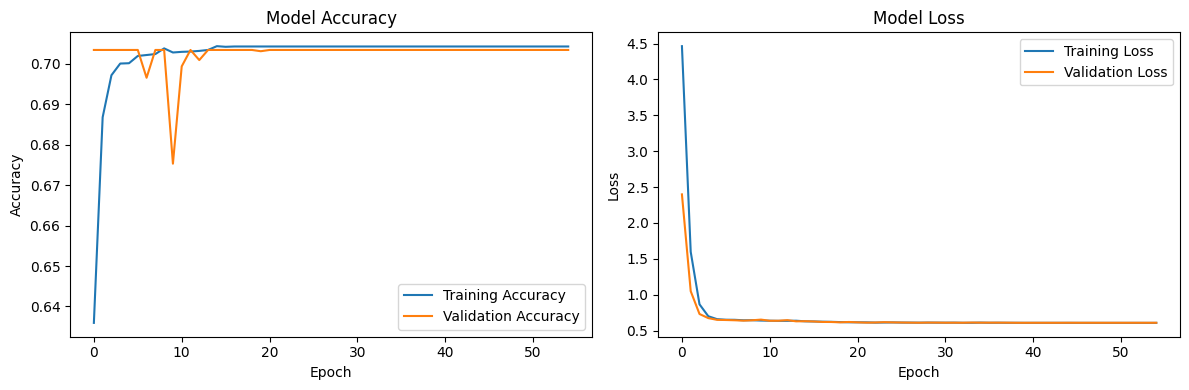

In [47]:
import matplotlib.pyplot as plt

# Plotting training history
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()